In [1]:
import projection
import numpy as np
import plot
from plot import plot_mass
import matplotlib.pyplot as plt
import read_chroma
import mass_spec
from pyteomics import mzml, auxiliary
from skimage.feature import peak_local_max
import time
import peak_detection
import benchmark
import matching
from matchms.importing import load_from_mgf
import utils
import importlib
import chromatof
import pybaselines
from scipy import ndimage
from skimage.restoration import estimate_sigma
from scipy import ndimage as ndi
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from scipy.signal import savgol_filter
import skimage
import os
import read_chroma
import glob
import plot
import mass_spec
import projection
import pyms_nist_search
import pyms
import baseline_correction
import peak_detection
import sys

In [2]:
melange1_names = ["1-methylcyclopentene","cyclohexene","4-methylheptane","4-methyl-3-penten-2-one","p-xylene","heptanal","nonanal"]
melange1_casnos = ["693-89-0","110-83-8","589-53-7","141-79-7", "106-42-3", "111-71-7", "124-19-6"]
len(melange1_names), len(melange1_casnos)

(7, 7)

In [3]:
melange2_names = ["benzene","1,7-octadiene","2,4,6-trimethylheptane","4-hexen-3-one","2-heptanone","1-chloroheptane","2-nonanone"]
melange2_casnos = ["71-43-2", "3710-30-3", "2613-61-8", "2497-21-4", "110-43-0", "629-06-1", "821-55-6"]
len(melange2_names), len(melange2_casnos)

(7, 7)

In [4]:
melange3_names = ["2-ethylfuran","ethylbenzene","4-heptanone","cyclohexanone","2,4-hexadiene"]
melange3_casnos = ["3208-16-0", "100-41-4", "123-19-3", "108-94-1", "592-46-1"]
len(melange3_names), len(melange3_casnos)

(5, 5)

In [5]:
melange_total_casnos = melange1_casnos + melange2_casnos + melange3_casnos
melange_total_names = melange1_names + melange2_names + melange3_names

In [6]:
def check_match(match, casnos_present):
    return np.array([databaseid for databaseid in [meta['casno'] for meta in match[:, 1]] if databaseid in casnos_present])

In [7]:
PATH = 'F:/Bureau/Elodie_CDF/'

In [8]:
files = glob.glob(PATH + "*.cdf")
files

['F:/Bureau/Elodie_CDF\\818826-etalon-VOC-melange1-split20-2D-d5000-MeOH.cdf',
 'F:/Bureau/Elodie_CDF\\818829-etalon-VOC-melange2-split20-2D-d5000-MeOH.cdf',
 'F:/Bureau/Elodie_CDF\\818830-etalon-VOC-tous-23-stds-split20-2D-d5000-MeOH.cdf',
 'F:/Bureau/Elodie_CDF\\854528-etalon-VOC-melange3-split20-2D-d5000-MeOH.cdf']

In [9]:
def read_chromatos(files, mod_time=1.25):
    chromato_ref_obj_list = []
    for file in files:
        print(file)
        chromato_ref_obj = read_chroma.read_chroma(file, mod_time)
        chromato_ref_obj_list.append(chromato_ref_obj)
    return chromato_ref_obj_list

In [10]:
chromato_ref_obj_list = read_chromatos(files)

F:/Bureau/Elodie_CDF\818826-etalon-VOC-melange1-split20-2D-d5000-MeOH.cdf
F:/Bureau/Elodie_CDF\818829-etalon-VOC-melange2-split20-2D-d5000-MeOH.cdf
F:/Bureau/Elodie_CDF\818830-etalon-VOC-tous-23-stds-split20-2D-d5000-MeOH.cdf
F:/Bureau/Elodie_CDF\854528-etalon-VOC-melange3-split20-2D-d5000-MeOH.cdf


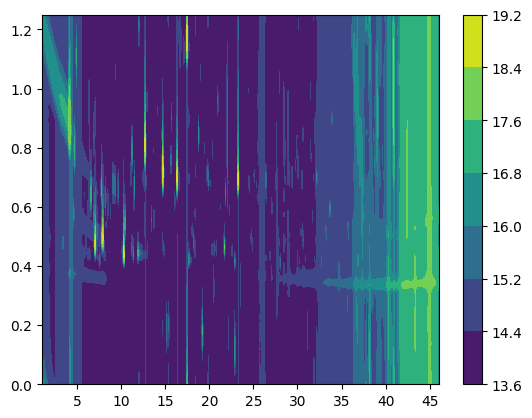

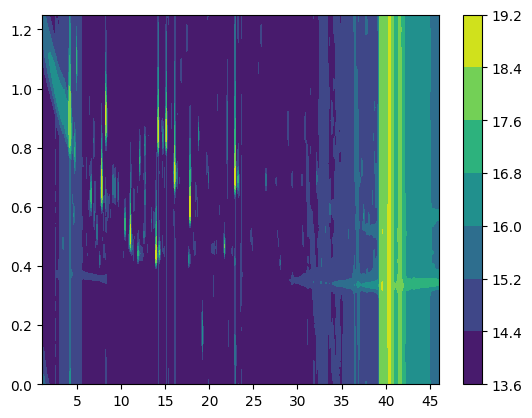

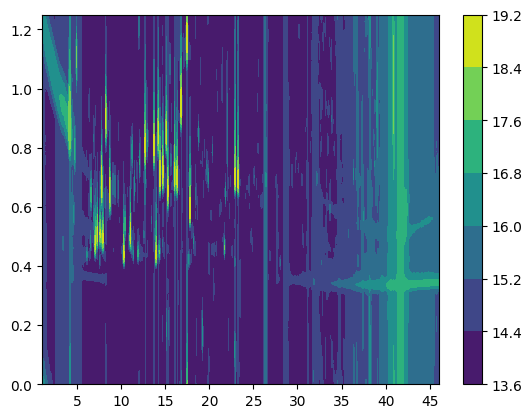

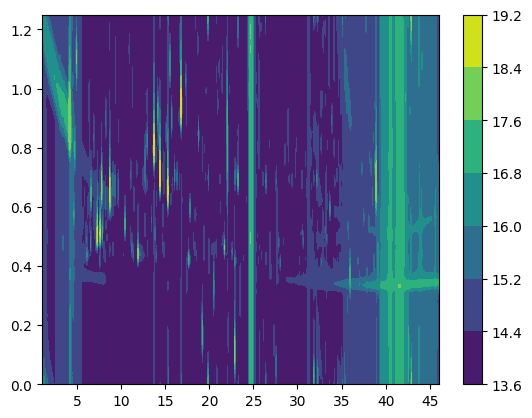

In [8]:
for i, chromato_ref_obj in enumerate(chromato_ref_obj_list):
    plot.visualizer((chromato_ref_obj_list[i][0], chromato_ref_obj_list[i][1]), log_chromato=True)

# Melange 1

In [11]:
chromato_m1,time_rn,spectra_obj_m1 = chromato_ref_obj_list[0]

In [12]:
full_spectra_m1 = mass_spec.read_full_spectra_centroid(spectra_obj=spectra_obj_m1)

--- 270.29122948646545 seconds --- to compute full spectra centroid


In [13]:
chromato_no_bl_m1 = baseline_correction.chromato_no_baseline(chromato_m1)

In [14]:
chromato_cube_m1 = read_chroma.full_spectra_to_chromato_cube(full_spectra=full_spectra_m1, spectra_obj=spectra_obj_m1)
chromato_cube_m1 = np.array(baseline_correction.chromato_cube_corrected_baseline(chromato_cube_m1))

In [15]:
sigma = estimate_sigma(chromato_no_bl_m1, channel_axis=None)
MIN_SEUIL = 5 * sigma * 100 / np.max(chromato_no_bl_m1)
MIN_SEUIL

0.0036503194924279547

In [16]:
coordinates_m1 = peak_detection.peak_detection(chromato_obj=(chromato_no_bl_m1, time_rn, spectra_obj_m1), spectra=None, chromato_cube=chromato_cube_m1, seuil=MIN_SEUIL, ABS_THRESHOLDS=None)
len(coordinates_m1)

1056

In [17]:
matches_m1 = matching.matching_nist_lib_from_chromato_cube((chromato_m1, time_rn, spectra_obj_m1), chromato_cube_m1, coordinates_m1, mod_time = 1.25, hit_prob_min=0)

c:\Users\Stan\AppData\Local\Programs\Python\Python38\lib\site-packages\pyms_nist_search\utils.py:123: UserWarning: Unable to parse the following character codes for string �-Methyltoluene: [-32].
  warnings.warn(f"Unable to parse the following character codes for string {hit_name}: {errors}.")
c:\Users\Stan\AppData\Local\Programs\Python\Python38\lib\site-packages\pyms_nist_search\utils.py:123: UserWarning: Unable to parse the following character codes for string Furan, �-ethyl-: [-32].
  warnings.warn(f"Unable to parse the following character codes for string {hit_name}: {errors}.")
c:\Users\Stan\AppData\Local\Programs\Python\Python38\lib\site-packages\pyms_nist_search\utils.py:123: UserWarning: Unable to parse the following character codes for string �-Methallyl acetate: [-31].
  warnings.warn(f"Unable to parse the following character codes for string {hit_name}: {errors}.")
c:\Users\Stan\AppData\Local\Programs\Python\Python38\lib\site-packages\pyms_nist_search\utils.py:123: UserWarni

nb peaks:
1056


c:\Users\Stan\pic\matching.py:73: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(match)


In [18]:
chromato_cd_m1 = projection.matrix_to_chromato(coordinates_m1,time_rn, 1.25, chromato_m1.shape)

In [19]:
casnos_dict = (utils.get_name_dict(matches_m1))

c:\Users\Stan\pic\plot.py:383: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  tmp = ax.scatter(x_pts,y_pts, c=cmap(i), marker=pt_shape, cmap='hsv')
c:\Users\Stan\pic\plot.py:383: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  tmp = ax.scatter(x_pts,y_pts, c=cmap(i), marker=pt_shape, cmap='hsv')


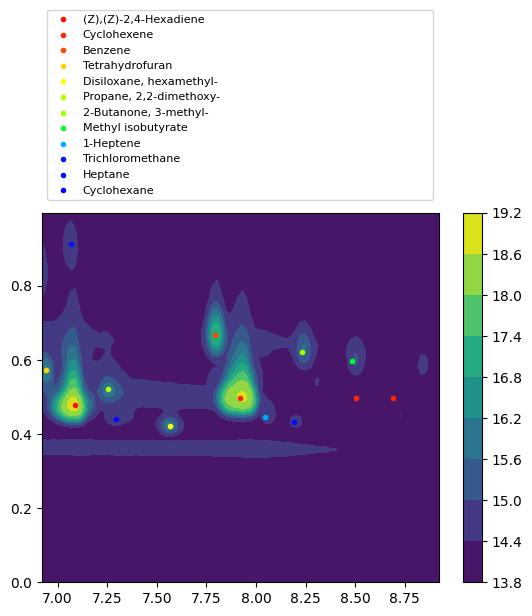

In [18]:
importlib.reload(plot)
plot.visualizer(chromato_obj=(chromato_m1, time_rn), mod_time=1.25, points=chromato_cd_m1, casnos_dict=casnos_dict, rt1=7.919863164682537, rt2=0.49698795180722893, rt1_window=1, rt2_window=0.5, log_chromato=True)

In [24]:
found_present = check_match(matches_m1, melange1_casnos)
print(found_present)
t = [len(coordinates_m1), len(np.unique(found_present)) / len(melange1_casnos), len(found_present) / len(coordinates_m1), len(found_present)]
t

['589-53-7' '111-71-7' '124-19-6' '110-83-8' '141-79-7' '124-19-6'
 '141-79-7' '110-83-8' '589-53-7' '111-71-7' '124-19-6' '141-79-7'
 '589-53-7' '106-42-3' '141-79-7' '124-19-6' '110-83-8' '111-71-7'
 '124-19-6' '124-19-6' '111-71-7' '124-19-6' '141-79-7' '111-71-7'
 '124-19-6' '124-19-6']


[1056, 0.8571428571428571, 0.02462121212121212, 26]

# Melange 2

In [20]:
chromato_m2,time_rn,spectra_obj_m2 = chromato_ref_obj_list[1]

In [21]:
full_spectra_m2 = mass_spec.read_full_spectra_centroid(spectra_obj=spectra_obj_m2)

--- 267.4412965774536 seconds --- to compute full spectra centroid


In [22]:
chromato_no_bl_m2 = baseline_correction.chromato_no_baseline(chromato_m2)
chromato_cube_m2 = read_chroma.full_spectra_to_chromato_cube(full_spectra=full_spectra_m2, spectra_obj=spectra_obj_m2)
chromato_cube_m2 = np.array(baseline_correction.chromato_cube_corrected_baseline(chromato_cube_m2))

In [23]:
sigma = estimate_sigma(chromato_no_bl_m2, channel_axis=None)
MIN_SEUIL = 5 * sigma * 100 / np.max(chromato_no_bl_m2)
print(MIN_SEUIL)
coordinates_m2 = peak_detection.peak_detection(chromato_obj=(chromato_no_bl_m2, time_rn, spectra_obj_m2), spectra=None, chromato_cube=chromato_cube_m2, seuil=MIN_SEUIL, ABS_THRESHOLDS=None)
len(coordinates_m2)

0.003401775263913389


729

In [24]:
matches_m2 = matching.matching_nist_lib_from_chromato_cube((chromato_m2, time_rn, spectra_obj_m2), chromato_cube_m2, coordinates_m2, mod_time = 1.25, hit_prob_min=0)
chromato_cd_m2 = projection.matrix_to_chromato(coordinates_m2,time_rn, 1.25, chromato_m2.shape)
casnos_dict2 = (utils.get_name_dict(matches_m2))

c:\Users\Stan\AppData\Local\Programs\Python\Python38\lib\site-packages\pyms_nist_search\utils.py:123: UserWarning: Unable to parse the following character codes for string �,�-Octadiene: [-32, -22].
  warnings.warn(f"Unable to parse the following character codes for string {hit_name}: {errors}.")
c:\Users\Stan\AppData\Local\Programs\Python\Python38\lib\site-packages\pyms_nist_search\utils.py:123: UserWarning: Unable to parse the following character codes for string cis-�,�-Hexylenic aldehyde: [-31, -25].
  warnings.warn(f"Unable to parse the following character codes for string {hit_name}: {errors}.")
c:\Users\Stan\AppData\Local\Programs\Python\Python38\lib\site-packages\pyms_nist_search\utils.py:123: UserWarning: Unable to parse the following character codes for string �-Methyl-�-crotonolactone: [-32, -25].
  warnings.warn(f"Unable to parse the following character codes for string {hit_name}: {errors}.")
c:\Users\Stan\AppData\Local\Programs\Python\Python38\lib\site-packages\pyms_nist_

nb peaks:
729


c:\Users\Stan\pic\plot.py:383: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  tmp = ax.scatter(x_pts,y_pts, c=cmap(i), marker=pt_shape, cmap='hsv')
c:\Users\Stan\pic\plot.py:383: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  tmp = ax.scatter(x_pts,y_pts, c=cmap(i), marker=pt_shape, cmap='hsv')


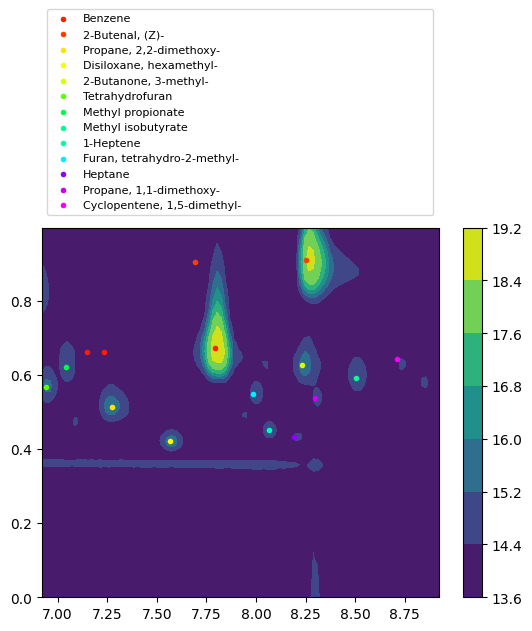

In [25]:
plot.visualizer(chromato_obj=(chromato_m2, time_rn), mod_time=1.25, points=chromato_cd_m2, casnos_dict=casnos_dict2, rt1=7.919863164682537, rt2=0.49698795180722893, rt1_window=1, rt2_window=0.5, log_chromato=True)

In [31]:
found_present = check_match(matches_m2, melange2_casnos)
print(found_present)
t2 = [len(coordinates_m2), len(np.unique(found_present)) / len(melange2_casnos), len(found_present) / len(coordinates_m2), len(found_present)]
t2

['2613-61-8' '821-55-6' '3710-30-3' '71-43-2' '110-43-0' '110-43-0'
 '2613-61-8' '2613-61-8' '821-55-6' '110-43-0' '821-55-6' '71-43-2'
 '2613-61-8' '821-55-6' '110-43-0' '71-43-2' '821-55-6' '110-43-0']


[729, 0.7142857142857143, 0.024691358024691357, 18]

# Melange 3

In [20]:
chromato_m3,time_rn,spectra_obj_m3 = chromato_ref_obj_list[3]

In [21]:
full_spectra_m3 = mass_spec.read_full_spectra_centroid(spectra_obj=spectra_obj_m3)

--- 271.88455080986023 seconds --- to compute full spectra centroid


In [22]:
chromato_no_bl_m3 = baseline_correction.chromato_no_baseline(chromato_m3)
chromato_cube_m3 = read_chroma.full_spectra_to_chromato_cube(full_spectra=full_spectra_m3, spectra_obj=spectra_obj_m3)
chromato_cube_m3 = np.array(baseline_correction.chromato_cube_corrected_baseline(chromato_cube_m3))

In [23]:
sigma = estimate_sigma(chromato_no_bl_m3, channel_axis=None)
MIN_SEUIL = 5 * sigma * 100 / np.max(chromato_no_bl_m3)
print(MIN_SEUIL)
coordinates_m3 = peak_detection.peak_detection(chromato_obj=(chromato_no_bl_m3, time_rn, spectra_obj_m3), spectra=None, chromato_cube=chromato_cube_m3, seuil=MIN_SEUIL, ABS_THRESHOLDS=None)
len(coordinates_m3)

0.0035005910783499424


852

In [24]:
matches_m3 = matching.matching_nist_lib_from_chromato_cube((chromato_m3, time_rn, spectra_obj_m3), chromato_cube_m3, coordinates_m3, mod_time = 1.25, hit_prob_min=0)
chromato_cd_m3 = projection.matrix_to_chromato(coordinates_m3,time_rn, 1.25, chromato_m3.shape)
casnos_dict3 = (utils.get_name_dict(matches_m3))

c:\Users\Stan\AppData\Local\Programs\Python\Python38\lib\site-packages\pyms_nist_search\utils.py:123: UserWarning: Unable to parse the following character codes for string �-Methylcyclopentanone: [-32].
  warnings.warn(f"Unable to parse the following character codes for string {hit_name}: {errors}.")
c:\Users\Stan\AppData\Local\Programs\Python\Python38\lib\site-packages\pyms_nist_search\utils.py:123: UserWarning: Unable to parse the following character codes for string �-Methyl-�-ethylacrolein: [-32, -31].
  warnings.warn(f"Unable to parse the following character codes for string {hit_name}: {errors}.")
c:\Users\Stan\AppData\Local\Programs\Python\Python38\lib\site-packages\pyms_nist_search\utils.py:123: UserWarning: Unable to parse the following character codes for string �-Ethyl-�-methylacrolein: [-31, -32].
  warnings.warn(f"Unable to parse the following character codes for string {hit_name}: {errors}.")
c:\Users\Stan\AppData\Local\Programs\Python\Python38\lib\site-packages\pyms_nist

nb peaks:
852


c:\Users\Stan\pic\plot.py:383: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  tmp = ax.scatter(x_pts,y_pts, c=cmap(i), marker=pt_shape, cmap='hsv')
c:\Users\Stan\pic\plot.py:383: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  tmp = ax.scatter(x_pts,y_pts, c=cmap(i), marker=pt_shape, cmap='hsv')


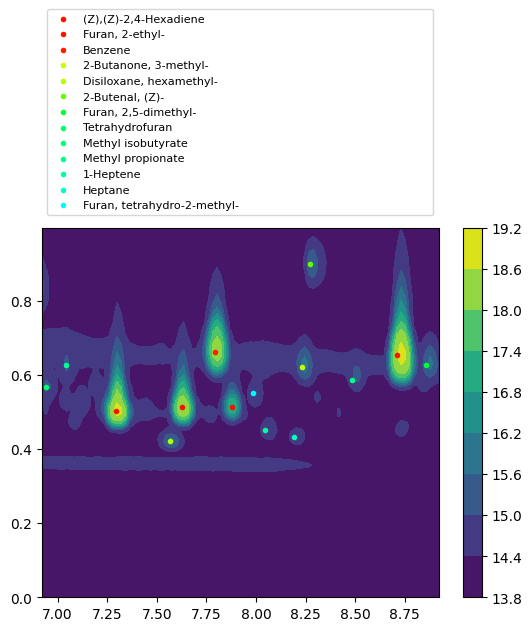

In [127]:
plot.visualizer(chromato_obj=(chromato_m3, time_rn), mod_time=1.25, points=chromato_cd_m3, casnos_dict=casnos_dict3, rt1=7.919863164682537, rt2=0.49698795180722893, rt1_window=1, rt2_window=0.5, log_chromato=True)

In [38]:
found_present = check_match(matches_m3, melange3_casnos)
print(found_present)
t3 = [len(coordinates_m3), len(np.unique(found_present)) / len(melange3_casnos), len(found_present) / len(coordinates_m3), len(found_present)]
t3

['100-41-4' '123-19-3' '3208-16-0' '108-94-1' '100-41-4' '123-19-3']


[852, 0.8, 0.007042253521126761, 6]

# Melange all

In [25]:
chromato_all,time_rn,spectra_obj_all = chromato_ref_obj_list[2]

In [26]:
full_spectra_all = mass_spec.read_full_spectra_centroid(spectra_obj=spectra_obj_all)

--- 268.32934761047363 seconds --- to compute full spectra centroid


In [27]:
chromato_no_bl_all = baseline_correction.chromato_no_baseline(chromato_all)
chromato_cube_all = read_chroma.full_spectra_to_chromato_cube(full_spectra=full_spectra_all, spectra_obj=spectra_obj_all)
chromato_cube_all = np.array(baseline_correction.chromato_cube_corrected_baseline(chromato_cube_all))

In [28]:
sigma = estimate_sigma(chromato_no_bl_all, channel_axis=None)
MIN_SEUIL = 5 * sigma * 100 / np.max(chromato_no_bl_all)
print(MIN_SEUIL)
coordinates_all = peak_detection.peak_detection(chromato_obj=(chromato_no_bl_all, time_rn, spectra_obj_all), spectra=None, chromato_cube=chromato_cube_all, seuil=MIN_SEUIL, ABS_THRESHOLDS=None)
len(coordinates_all)

0.0036381362534775663


714

In [29]:
matches_all = matching.matching_nist_lib_from_chromato_cube((chromato_all, time_rn, spectra_obj_all), chromato_cube_all, coordinates_all, mod_time = 1.25, hit_prob_min=0)
chromato_cd_all = projection.matrix_to_chromato(coordinates_all,time_rn, 1.25, chromato_all.shape)
casnos_dictall = (utils.get_name_dict(matches_all))

c:\Users\Stan\AppData\Local\Programs\Python\Python38\lib\site-packages\pyms_nist_search\utils.py:123: UserWarning: Unable to parse the following character codes for string �-Methyl-�-crotonolactone: [-32, -25].
  warnings.warn(f"Unable to parse the following character codes for string {hit_name}: {errors}.")
c:\Users\Stan\AppData\Local\Programs\Python\Python38\lib\site-packages\pyms_nist_search\utils.py:123: UserWarning: Unable to parse the following character codes for string cis-�-Methylstyrene: [-31].
  warnings.warn(f"Unable to parse the following character codes for string {hit_name}: {errors}.")
c:\Users\Stan\AppData\Local\Programs\Python\Python38\lib\site-packages\pyms_nist_search\utils.py:123: UserWarning: Unable to parse the following character codes for string �,�-Diacetylethane: [-32, -31].
  warnings.warn(f"Unable to parse the following character codes for string {hit_name}: {errors}.")
c:\Users\Stan\AppData\Local\Programs\Python\Python38\lib\site-packages\pyms_nist_search\

nb peaks:
714


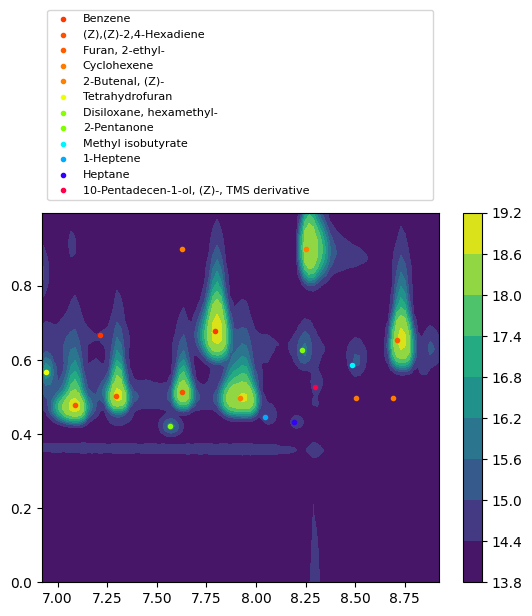

In [44]:
plot.visualizer(chromato_obj=(chromato_all, time_rn), mod_time=1.25, points=chromato_cd_all, casnos_dict=casnos_dictall, rt1=7.919863164682537, rt2=0.49698795180722893, rt1_window=1, rt2_window=0.5, log_chromato=True)

In [45]:
found_present = check_match(matches_all, melange_total_casnos)
print(found_present)
tall = [len(coordinates_all), len(np.unique(found_present)) / len(melange_total_casnos), len(found_present) / len(coordinates_all), len(found_present)]
tall

['2613-61-8' '100-41-4' '589-53-7' '124-19-6' '821-55-6' '110-43-0'
 '3710-30-3' '71-43-2' '123-19-3' '111-71-7' '3208-16-0' '141-79-7'
 '2497-21-4' '110-83-8' '2613-61-8' '124-19-6' '110-43-0' '141-79-7'
 '110-43-0' '110-83-8' '124-19-6' '589-53-7' '111-71-7' '821-55-6'
 '2613-61-8' '821-55-6' '589-53-7' '141-79-7' '124-19-6' '2613-61-8'
 '108-94-1' '71-43-2' '110-83-8' '124-19-6' '821-55-6' '110-43-0'
 '110-43-0' '124-19-6' '124-19-6' '124-19-6' '821-55-6' '111-71-7'
 '111-71-7' '141-79-7' '124-19-6']


[714, 0.7894736842105263, 0.06302521008403361, 45]

# Synthese plot compounds overlap 

In [ ]:
casnos_dict['Cyclohexene'], casnos_dict['(Z),(Z)-2,4-Hexadiene']

([[7.919863164682537, 0.49698795180722893],
  [8.503466077260583, 0.49698795180722893],
  [8.691052727732098, 0.49698795180722893]],
 [[7.086144718142473, 0.47690763052208834],
  [6.398326999746919, 0.4718875502008032]])

In [ ]:
casnos_dict3['(Z),(Z)-2,4-Hexadiene']

[[7.29457432977749, 0.5020080321285141],
 [7.628061708393515, 0.5120481927710844],
 [7.878177242355534, 0.5120481927710844],
 [6.54422772789143, 0.4819277108433735]]

In [114]:
casnos_dictall['Cyclohexene'], casnos_dictall['(Z),(Z)-2,4-Hexadiene']

([[7.919863164682537, 0.49698795180722893],
  [8.503466077260583, 0.49698795180722893],
  [8.691052727732098, 0.49698795180722893]],
 [[7.086144718142473, 0.47690763052208834],
  [7.29457432977749, 0.5020080321285141],
  [7.628061708393515, 0.5120481927710844],
  [6.54422772789143, 0.4819277108433735]])

In [ ]:
rt1=7.919863164682537
rt2=0.49698795180722893
rt1_window=0.5
rt2_window=0.2

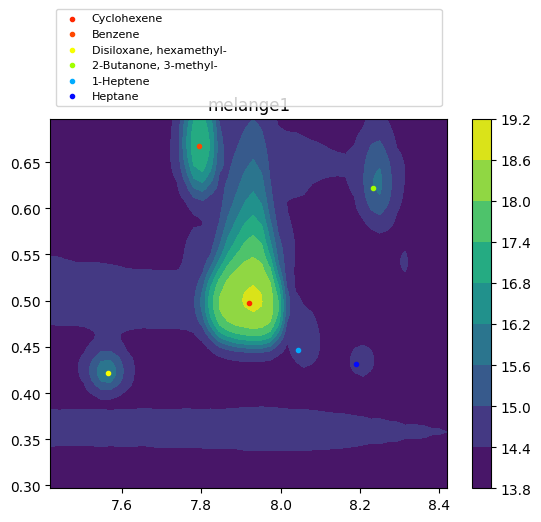

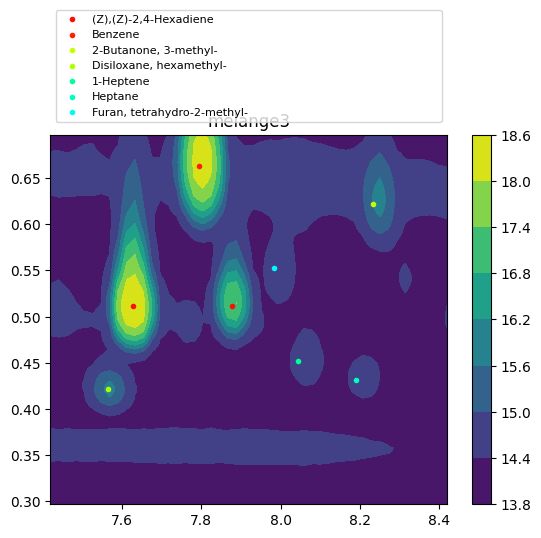

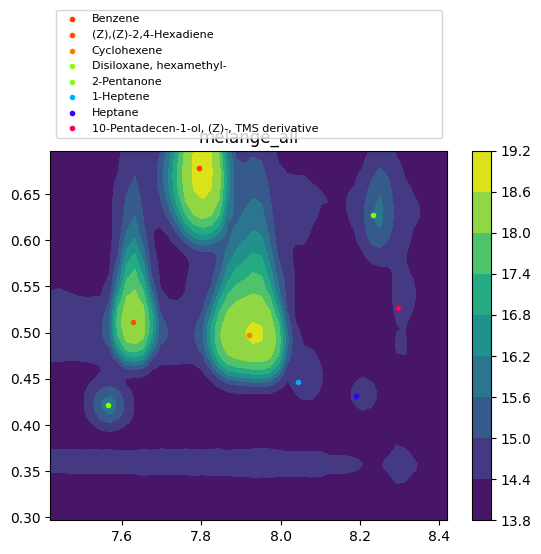

In [139]:
# Mélange 1
plot.visualizer(chromato_obj=(chromato_m1, time_rn), mod_time=1.25, points=chromato_cd_m1, casnos_dict=casnos_dict, rt1=rt1, rt2=rt2, rt1_window=rt1_window, rt2_window=rt2_window, log_chromato=True, title="melange1")
# Mélange 3
plot.visualizer(chromato_obj=(chromato_m3, time_rn), mod_time=1.25, points=chromato_cd_m3, casnos_dict=casnos_dict3, rt1=rt1, rt2=rt2, rt1_window=rt1_window, rt2_window=rt2_window, log_chromato=True, title="melange3")
# Mélange des deux
plot.visualizer(chromato_obj=(chromato_all, time_rn), mod_time=1.25, points=chromato_cd_all, casnos_dict=casnos_dictall, rt1=rt1, rt2=rt2, rt1_window=rt1_window, rt2_window=rt2_window, log_chromato=True, title="melange_all")

In [56]:
spectra_obj_m1[4], spectra_obj_all[4]
l1, l2, mv, iv, range_min, range_max = spectra_obj_m1

In [41]:
rt1=7.919863164682537
rt2=0.49698795180722893
rt1_window=0.5
rt2_window=0.2

m54

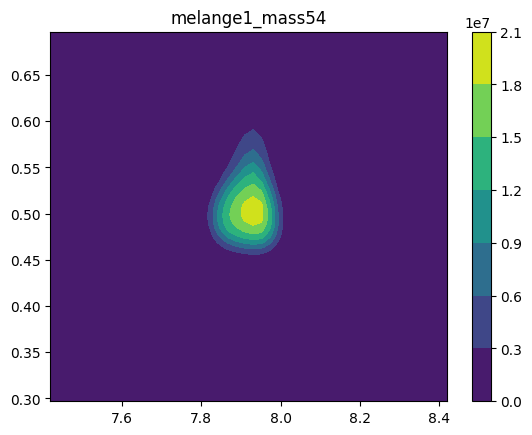

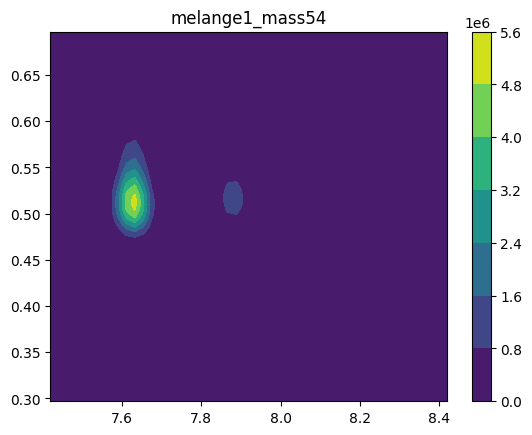

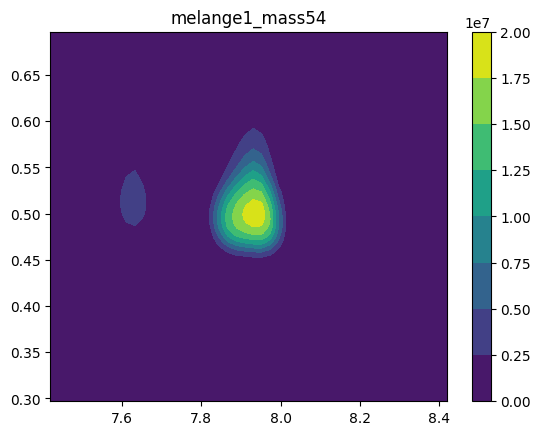

In [137]:
tm = 54
offset = tm - range_min
plot.visualizer(chromato_obj=(chromato_cube_m1[offset], time_rn), mod_time=1.25, rt1=rt1, rt2=rt2, rt1_window=rt1_window, rt2_window=rt2_window, log_chromato=False, title="melange1_mass54")
plot.visualizer(chromato_obj=(chromato_cube_m3[offset], time_rn), mod_time=1.25, rt1=rt1, rt2=rt2, rt1_window=rt1_window, rt2_window=rt2_window, log_chromato=False, title="melange3_mass54")
plot.visualizer(chromato_obj=(chromato_cube_all[offset], time_rn), mod_time=1.25, rt1=rt1, rt2=rt2, rt1_window=rt1_window, rt2_window=rt2_window, log_chromato=False, title="melange_all_mass54")

Dans le mélange on retrouve bien Cyclohexene en 7.919863164682537, 0.49698795180722893 comme nous l'avions detecté dans le premier mélange en 7.919863164682537, 0.49698795180722893.

La tâche sur la gauche est moins intense que celle du centre associée au Cyclohexene, ce qui est logique puisque l'abondance de la masse 54 est plus faible pour le (Z),(Z)-2,4-Hexadiene

m67

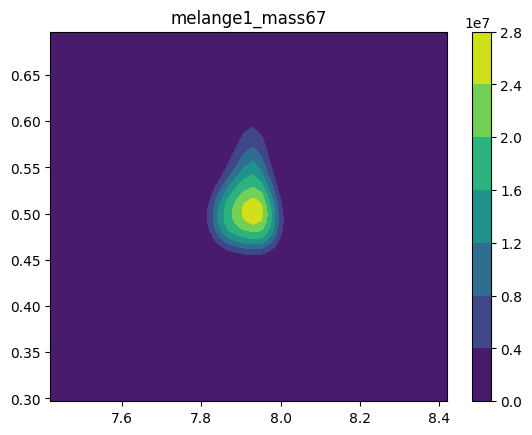

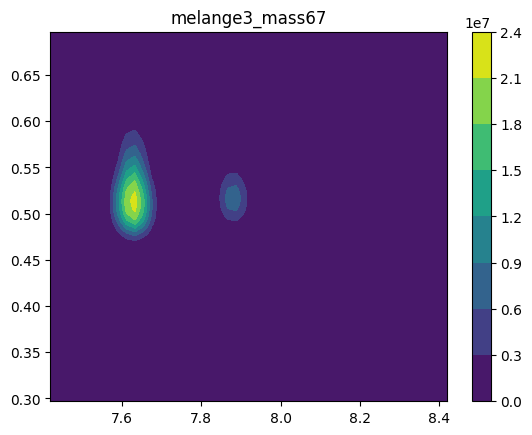

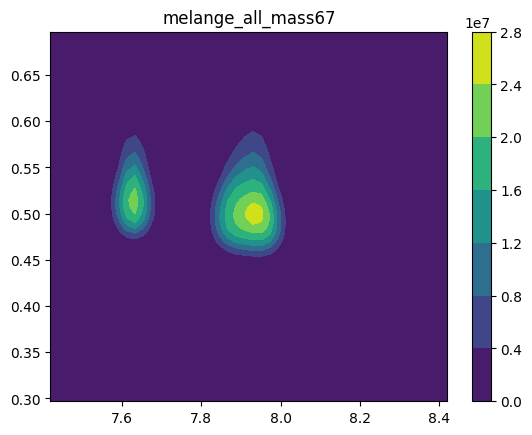

In [63]:
tm = 67
offset = tm - range_min
plot.visualizer(chromato_obj=(chromato_cube_m1[offset], time_rn), mod_time=1.25, rt1=rt1, rt2=rt2, rt1_window=rt1_window, rt2_window=rt2_window, log_chromato=False, title="melange1_mass67")
plot.visualizer(chromato_obj=(chromato_cube_m3[offset], time_rn), mod_time=1.25, rt1=rt1, rt2=rt2, rt1_window=rt1_window, rt2_window=rt2_window, log_chromato=False, title="melange3_mass67")
plot.visualizer(chromato_obj=(chromato_cube_all[offset], time_rn), mod_time=1.25, rt1=rt1, rt2=rt2, rt1_window=rt1_window, rt2_window=rt2_window, log_chromato=False, title="melange_all_mass67")

A cette masse on retrouve bien les deux taches associés au Cyclohexene et (Z),(Z)-2,4-Hexadiene mais la tâche associée au Cyclohexene ne change pas du tout de forme (ou vraiment que très peu même si c'est parfaitement à l'endroit ou ça devrait changer) entre le plot de la masse 54 et 67 alors que le (Z),(Z)-2,4-Hexadiene devrait s'ajouter au Cyclohexene dans la masse 67 puisque le Cyclohexene est detecté en 7.919863164682537, 0.49698795180722893 et dans le mélange contenant (Z),(Z)-2,4-Hexadiene est detecté en 7.878177242355534, 0.5120481927710844. D'ailleurs les intensités entre le plot du premier mélange à la masse 67 et celui du gros mélange à la masse 67 sont les mêmes. 

Cela pourrait s'expliquer si le Cyclohexene et le (Z),(Z)-2,4-Hexadiene sont déjà mélangés dans le premier mélange mais d'après les informations d'Elodie il n'est pas supposé y avoir de (Z),(Z)-2,4-Hexadiene dans le premier mélange


c:\Users\Stan\pic\plot.py:383: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  tmp = ax.scatter(x_pts,y_pts, c=cmap(i), marker=pt_shape, cmap='hsv')
c:\Users\Stan\pic\plot.py:383: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  tmp = ax.scatter(x_pts,y_pts, c=cmap(i), marker=pt_shape, cmap='hsv')


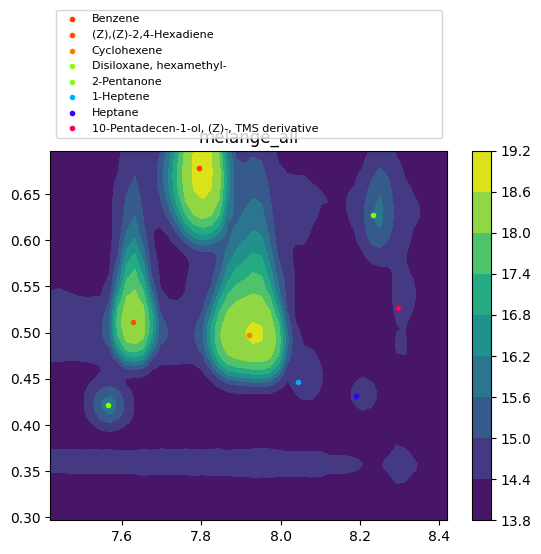

In [138]:
plot.visualizer(chromato_obj=(chromato_all, time_rn), mod_time=1.25, points=chromato_cd_all, casnos_dict=casnos_dictall, rt1=rt1, rt2=rt2, rt1_window=rt1_window, rt2_window=rt2_window, log_chromato=True, title="melange_all")

Normalement c'est censé être 2,4-Hexadiene et non pas (Z),(Z)-2,4-Hexadiene mais les deux spectres sont très similaires
https://webbook.nist.gov/cgi/cbook.cgi?ID=C6108618&Units=SI&Mask=200#Mass-Spec
https://webbook.nist.gov/cgi/cbook.cgi?ID=C592461&Units=SI&Mask=200#Mass-Spec


On retrouve bien les deux pics mais ils semblent pas spécialement mélangés...

# Test avec une autre méthode de détection

In [32]:
sigma = estimate_sigma(chromato_no_bl_all, channel_axis=None)
MIN_SEUIL = 5 * sigma * 100 / np.max(chromato_no_bl_all)
print(MIN_SEUIL)
coordinates_all_dog = peak_detection.peak_detection(chromato_obj=(chromato_no_bl_all, time_rn, spectra_obj_all), method='DoG', mode='mass_per_mass', spectra=None, chromato_cube=chromato_cube_all, seuil=MIN_SEUIL, ABS_THRESHOLDS=0.1)
len(coordinates_all)

0.0036381362534775663


c:\Users\Stan\pic\peak_detection.py:88: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  clusters = np.array(clusters)


714

In [38]:
matches_all_dog = matching.matching_nist_lib_from_chromato_cube((chromato_all, time_rn, spectra_obj_all), chromato_cube_all, coordinates_all_dog, mod_time = 1.25, hit_prob_min=0)
chromato_cd_all_dog = projection.matrix_to_chromato(coordinates_all_dog,time_rn, 1.25, chromato_all.shape)
casnos_dictall_dog = (utils.get_name_dict(matches_all_dog))

nb peaks:
475


In [52]:
casnos_dictall_dog_shuffled = utils.shuffle_dict(casnos_dictall_dog)

c:\Users\Stan\pic\plot.py:383: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  tmp = ax.scatter(x_pts,y_pts, c=cmap(i), marker=pt_shape, cmap='hsv')
c:\Users\Stan\pic\plot.py:383: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  tmp = ax.scatter(x_pts,y_pts, c=cmap(i), marker=pt_shape, cmap='hsv')


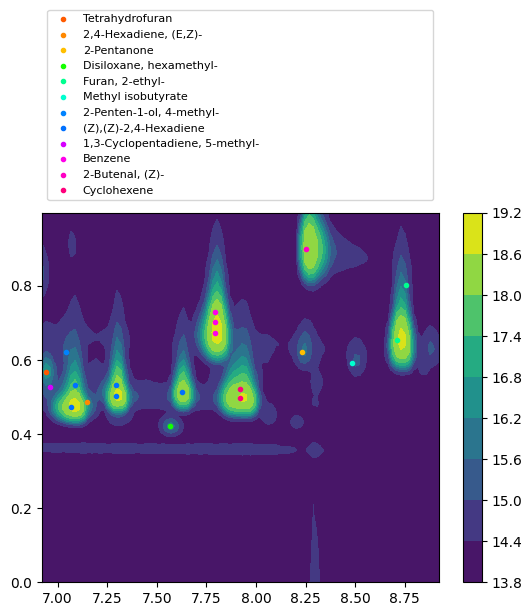

In [53]:
plot.visualizer(chromato_obj=(chromato_all, time_rn), mod_time=1.25, points=chromato_cd_all_dog, casnos_dict=casnos_dictall_dog_shuffled, rt1=7.919863164682537, rt2=0.49698795180722893, rt1_window=1, rt2_window=0.5, log_chromato=True)

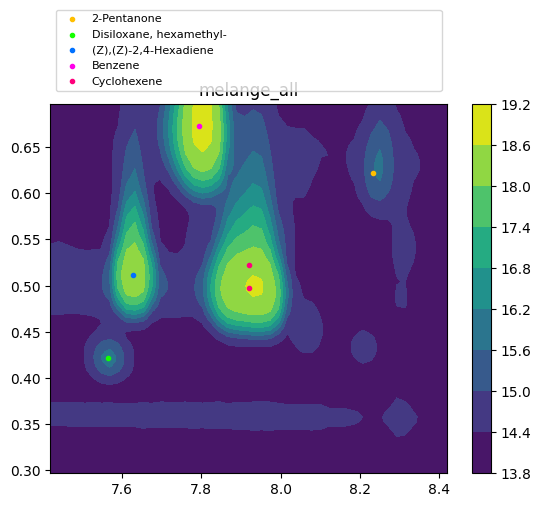

In [54]:
plot.visualizer(chromato_obj=(chromato_all, time_rn), mod_time=1.25, points=chromato_cd_all_dog, casnos_dict=casnos_dictall_dog_shuffled, rt1=rt1, rt2=rt2, rt1_window=rt1_window, rt2_window=rt2_window, log_chromato=True, title="melange_all")

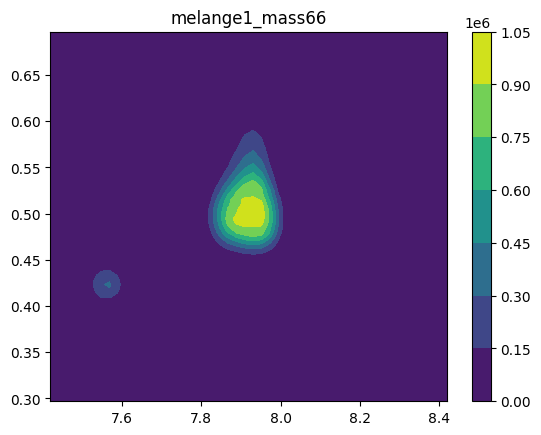

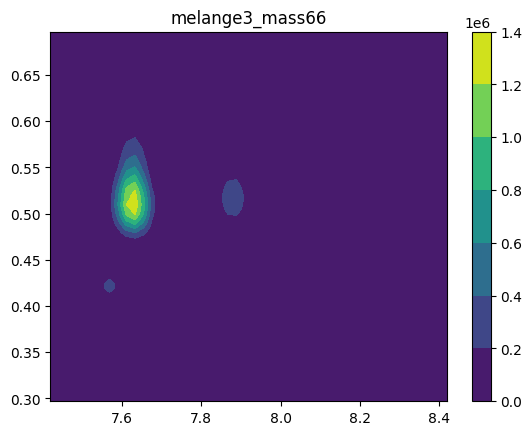

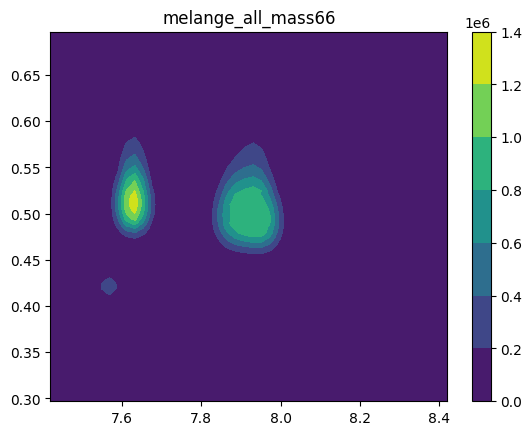

In [59]:
tm = 66
offset = tm - range_min
plot.visualizer(chromato_obj=(chromato_cube_m1[offset], time_rn), mod_time=1.25, rt1=rt1, rt2=rt2, rt1_window=rt1_window, rt2_window=rt2_window, log_chromato=False, title="melange1_mass66")
plot.visualizer(chromato_obj=(chromato_cube_m3[offset], time_rn), mod_time=1.25, rt1=rt1, rt2=rt2, rt1_window=rt1_window, rt2_window=rt2_window, log_chromato=False, title="melange3_mass66")
plot.visualizer(chromato_obj=(chromato_cube_all[offset], time_rn), mod_time=1.25, rt1=rt1, rt2=rt2, rt1_window=rt1_window, rt2_window=rt2_window, log_chromato=False, title="melange_all_mass66")